Analyse acutal task sequences (intv 5 and 6)

In [1]:
import pandas as pd
import pickle
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load data
xmlsaetze = pickle.load(open("../00_data/cleaned/xmlsaetze.pkl", "rb"))
df = pickle.load(open("../00_data/cleaned/sitzungssummary.pkl", "rb"))

Intervention 5

In [3]:
# merge and prepare
df_5 = df[df.interventiongroup == "5"]
df_5 = pd.merge(df_5, xmlsaetze, on="UebungsID")
df_5 = df_5[["UebungsID", "UserID_x", "AufgabenID", "Version", "Datum_y", "SatzID"]]

# get all exercises from Intv 5
aufgabenID = df_5.AufgabenID.unique()

# Create an empty list of the sequences
sequences = []

for x in aufgabenID:
    df_aufg = df_5[df_5.AufgabenID == x]

    # all session ids
    uebungsID = df_aufg.UebungsID.unique()

    for y in uebungsID:
        sequence_temp = df_aufg[df_aufg.UebungsID == y]
        sequence_temp = sequence_temp.sort_values(by=["Datum_y"])
        id_list = sequence_temp["SatzID"].tolist()
        sequences.extend([id_list])


from Levenshtein import distance

# Create  empty list to store Levenshtein distances
distances = []

# Iterate through sequences and calculate Levenshtein distance
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        distances.append(distance(sequences[i], sequences[j]))

# Create DataFrame to store Levenshtein distances
levenshtein_score_intv5 = pd.DataFrame(distances, columns=["Levenshtein_score"])

print(len(levenshtein_score_intv5))

16430778


<AxesSubplot:xlabel='Levenshtein_score', ylabel='Count'>

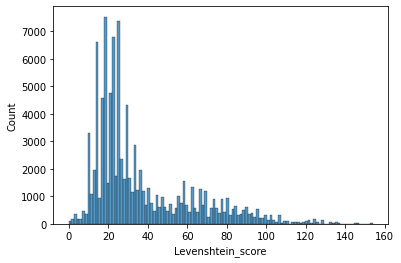

In [4]:
# downsample and plot
n = 100000
downsampled_data_intv5 = levenshtein_score_intv5.sample(n)
sns.histplot(data=downsampled_data_intv5, x="Levenshtein_score")

Intervention 6

In [5]:
df_6 = df[df.interventiongroup == "6"]
df_6 = pd.merge(df_6, xmlsaetze, on="UebungsID")
df_6 = df_6[["UebungsID", "UserID_x", "AufgabenID", "Version", "Datum_y", "SatzID"]]

# get all exercises from Intv 5
aufgabenID = df_6.AufgabenID.unique()

# Create an empty list of the sequences
sequences = []

for x in aufgabenID:
    df_aufg = df_6[df_6.AufgabenID == x]

    # all session ids
    uebungsID = df_aufg.UebungsID.unique()

    for y in uebungsID:
        sequence_temp = df_aufg[df_aufg.UebungsID == y]
        sequence_temp = sequence_temp.sort_values(by=["Datum_y"])
        id_list = sequence_temp["SatzID"].tolist()
        sequences.extend([id_list])


from Levenshtein import distance

# Create empty list to store Levenshtein distances
distances = []

# Iterate through sequences and calculate Levenshtein distance
for i in range(len(sequences)):
    for j in range(i + 1, len(sequences)):
        distances.append(distance(sequences[i], sequences[j]))

# Create DataFrame to store Levenshtein distances
levenshtein_score_intv6 = pd.DataFrame(distances, columns=["Levenshtein_score"])

print(len(levenshtein_score_intv6))

19192110


<AxesSubplot:xlabel='Levenshtein_score', ylabel='Count'>

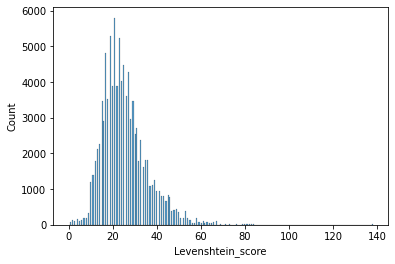

In [6]:
# downsample and split
n = 100000
downsampled_data_intv6 = levenshtein_score_intv6.sample(n)
sns.histplot(data=downsampled_data_intv6, x="Levenshtein_score")